In [3]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [18]:
#数据导入
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
print (np.unique(y))
#训练集和测试集划分
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
#标准化
sc=StandardScaler()
sc.fit(X_train)#计算样本的均值和标准差
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
#感知器分类
ppn=Perceptron(n_iter=40,eta0=0.1,random_state=0)#迭代次数、学习速率、重排训练集
ppn.fit(X_train_std,y_train)
#模型预测
y_pred=ppn.predict(X_test_std)
print ('Accuracy:%.2f' %accuracy_score(y_test,y_pred))#准确率

[0 1 2]
Accuracy:0.80


d:\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


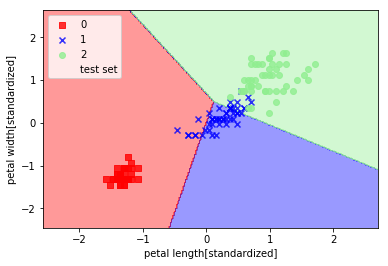

In [19]:
#绘制决策边界
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    # 设置标记点和颜色
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
 
    # 绘制决策面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    #绘制所有样本
    X_test,y_test=X[test_idx,:],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
    #高亮预测样本
    if test_idx:
        X_test,y_test =X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha=1.0,linewidths=1,marker='o',s=55,label='test set')
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.show()